# tienda en línea internacional

En esta investigación se realizarán análisis a datsets de una tienda online internacional, para estudiar los datos copilados de las pruebas que no fueron completadas por los predecesores, con el fin de analizar los resultados del test A/B para observar el comportamiento de ambos grupos.


Por este motivo, se buscará lo siguiente:


1. Abrir el archivo de datos y analizar la información general.
2. Preprocesar los datos.
3. Realizar un análisis exploratorio.
4. Análisis de un test A/B.
5. Escribir una conclusión general.

## Inicialización

In [60]:
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as stats
import math as mth
import numpy as np
import pandas as pd

### Cargar los datos

In [61]:
first_events_data = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
first_events_data

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [62]:
users_data = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
users_data

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
58698,1DB53B933257165D,2020-12-20,EU,Android
58699,538643EB4527ED03,2020-12-20,EU,Mac
58700,7ADEE837D5D8CBBD,2020-12-20,EU,PC
58701,1C7D23927835213F,2020-12-20,EU,iPhone


In [63]:
events_data = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
events_data

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [64]:
test_data = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
test_data

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


### Explorar la información general.

In [65]:
first_events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [66]:
first_events_data['start_dt'] = pd.to_datetime(first_events_data['start_dt'])
first_events_data['finish_dt'] = pd.to_datetime(first_events_data['finish_dt'])
first_events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [67]:
first_events_data.duplicated().sum()

0

In [68]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [69]:
users_data['first_date'] = pd.to_datetime(users_data['first_date'])
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [70]:
users_data.duplicated().sum()

0

In [71]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [72]:
events_data['event_dt'] = pd.to_datetime(events_data['event_dt'])
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [73]:
events_data.duplicated().sum()

0

In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [75]:
test_data.duplicated().sum()

0

Se importaron los cuatro datasets, y se pudo observar que los datos se encuentran en orden, solo que los dataframes de nuevos usuarios, eventos y primeros eventos; las columnas de tipo 'date', estaba en formato object y se le cambió a formato datetime. Además, hay una columna en el dataframe de eventos que tiene valores ausentes, pero se decidio dejar esos valores y tomarlos como cero, debido a la gran cantidad de valores de este tipo.

## análisis exploratorio de datos

In [76]:
users_to_remove = test_data[test_data['ab_test'].isin(['recommender_system_test', 'interface_eu_test'])].groupby('user_id').filter(lambda x: len(x) > 1)['user_id'].unique()

# Eliminamos los usuarios del dataframe original
test_data = test_data[~test_data['user_id'].isin(users_to_remove)]

# Mostramos el dataframe resultante
print(test_data)

                user_id group                  ab_test
0      D1ABA3E2887B6A73     A  recommender_system_test
1      A7A3664BD6242119     A  recommender_system_test
4      4FF2998A348C484F     A  recommender_system_test
5      7473E0943673C09E     A  recommender_system_test
6      C46FE336D240A054     A  recommender_system_test
...                 ...   ...                      ...
14520  1D302F8688B91781     B        interface_eu_test
14521  3DE51B726983B657     A        interface_eu_test
14522  F501F79D332BE86C     A        interface_eu_test
14523  63FBE257B05F2245     A        interface_eu_test
14524  79F9ABFB029CF724     B        interface_eu_test

[12751 rows x 3 columns]


In [77]:
new_test_data = test_data.query('ab_test == "recommender_system_test"')
new_test_data

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test
...,...,...,...
3670,053FB26D6D49EDDC,A,recommender_system_test
3671,9D263B8EF15CF188,B,recommender_system_test
3672,F2FBBA33F37DEC46,A,recommender_system_test
3673,29C92313A98B1176,B,recommender_system_test


In [78]:
new_test_data = new_test_data.merge(events_data, on='user_id', how='left')
new_test_data

,user_id,group,ab_test,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,NaN
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,NaN
...,...,...,...,...,...,...
18189,6715343AFBA285AE,B,recommender_system_test,2020-12-07 10:12:15,login,NaN
18190,6715343AFBA285AE,B,recommender_system_test,2020-12-08 22:51:16,login,NaN
18191,6715343AFBA285AE,B,recommender_system_test,2020-12-09 02:28:03,login,NaN
18192,6715343AFBA285AE,B,recommender_system_test,2020-12-10 22:55:14,login,NaN


In [79]:
new_test_data = new_test_data.merge(users_data, on='user_id', how='left')
new_test_data

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,EU,PC
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN,2020-12-07,EU,PC
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN,2020-12-07,EU,PC
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,NaN,2020-12-07,EU,PC
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,NaN,2020-12-20,EU,iPhone
...,...,...,...,...,...,...,...,...,...
18189,6715343AFBA285AE,B,recommender_system_test,2020-12-07 10:12:15,login,NaN,2020-12-07,CIS,Android
18190,6715343AFBA285AE,B,recommender_system_test,2020-12-08 22:51:16,login,NaN,2020-12-07,CIS,Android
18191,6715343AFBA285AE,B,recommender_system_test,2020-12-09 02:28:03,login,NaN,2020-12-07,CIS,Android
18192,6715343AFBA285AE,B,recommender_system_test,2020-12-10 22:55:14,login,NaN,2020-12-07,CIS,Android


In [80]:
new_test_data['days_between_events'] = (new_test_data['event_dt'].dt.date - new_test_data['first_date'].dt.date).dt.days                                 
new_test_data = new_test_data.query('days_between_events <= 14' and 'first_date <= "2021-01-01"' and 'region == "EU"')
new_test_data

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device,days_between_events
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,EU,PC,0
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN,2020-12-07,EU,PC,0
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN,2020-12-07,EU,PC,0
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,NaN,2020-12-07,EU,PC,0
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,NaN,2020-12-20,EU,iPhone,0
...,...,...,...,...,...,...,...,...,...,...
16954,80712ED4EA1B52A5,A,recommender_system_test,2020-12-15 20:10:06,product_page,NaN,2020-12-14,EU,Android,1
16955,80712ED4EA1B52A5,A,recommender_system_test,2020-12-20 20:01:34,product_page,NaN,2020-12-14,EU,Android,6
16956,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14 05:48:50,login,NaN,2020-12-14,EU,Android,0
16957,80712ED4EA1B52A5,A,recommender_system_test,2020-12-15 20:10:03,login,NaN,2020-12-14,EU,Android,1


In [81]:
new_test_data['user_id'].value_counts()

1198061F6AF34B7B    28
115EBC1CA027854A    24
CED71698585A2E46    24
1BFEE479308EFF44    24
6E3DF9C69A6B607E    21
                    ..
10387B8D694D539C     1
3ED90BE0DC2A3FD3     1
6D88BE6410DBB984     1
8F5B3D96E7D43A02     1
436D6F820AE149EA     1
Name: user_id, Length: 2594, dtype: int64

### conversión en las diferentes etapas del embudo

In [82]:
events = new_test_data.pivot_table(index='user_id', columns='event_name', values='event_dt', aggfunc='min')
events.head()

event_name,login,product_cart,product_page,purchase
user_id,,,,
0010A1C096941592,2020-12-17 21:07:27,NaT,2020-12-17 21:07:27,2020-12-17 21:07:27
003DF44D7589BBD4,2020-12-17 06:17:49,2020-12-17 06:17:49,2020-12-17 06:17:49,NaT
00505E15A9D81546,2020-12-14 17:28:32,NaT,NaT,NaT
005E096DBD379BCF,2020-12-21 07:20:39,NaT,NaT,2020-12-21 07:20:39
006E3E4E232CE760,2020-12-17 16:40:41,NaT,2020-12-17 16:40:42,NaT


In [41]:
step_1 = ~events['login'].isna()
step_2 = step_1 & (events['product_page'] > events['login'])
step_3 = step_2 & (events['product_cart'] > events['product_page'])
step_4 = step_3 & (events['purchase'] > events['product_cart'])

n_login = events[step_1].shape[0]
n_product_page = events[step_2].shape[0]
n_product_cart = events[step_3].shape[0]
n_purchase = events[step_4].shape[0]

print('Entrantes:', n_login)
print('Aparición de la pantalla del producto:', n_product_page)
print('Aparicion de la pantalla del carrito de compras:', n_product_cart)
print('Aparicion de la pantalla del pago:', n_purchase)

Entrantes: 2593
Aparición de la pantalla del producto: 909
Aparicion de la pantalla del carrito de compras: 57
Aparicion de la pantalla del pago: 1


In [42]:
1 / 2593

0.0003856536829926726

Se puede observar que de los 2593 usuarios que empezaron el recorrido desde el primer evento, solo 1 terminaron el pedido, lo cual equivale menos del 0,03% de usuarios. Sin embargo, hay otros usuarios que terminaron el pedido por diferentes vias 

In [43]:
step_1 = ~events['product_page'].isna()
step_2 = step_1 & (events['product_cart'] > events['product_page'])
step_3 = step_2 & (events['purchase'] > events['product_cart'])

n_product_page = events[step_1].shape[0]
n_product_cart = events[step_2].shape[0]
n_purchase = events[step_3].shape[0]

print('Aparición de la pantalla del producto:', n_product_page)
print('Aparicion de la pantalla del carrito de compras:', n_product_cart)
print('Aparicion de la pantalla del pago:', n_purchase)

Aparición de la pantalla del producto: 1632
Aparicion de la pantalla del carrito de compras: 154
Aparicion de la pantalla del pago: 1


In [44]:
1/1632

0.0006127450980392157

Se puede observar que de los 1632 usuarios que empezaron el recorrido desde otro evento, solo 13 terminaron el pedido, lo cual equivale al 0.06% de usuarios. No muchos completaron el recorrido

In [45]:
step_1 = ~events['product_cart'].isna()
step_2 = step_1 & (events['purchase'] > events['product_cart'])

n_product_cart = events[step_1].shape[0]
n_purchase = events[step_2].shape[0]

print('Aparicion de la pantalla del carrito de compras:', n_product_cart)
print('Aparicion de la pantalla del pago:', n_purchase)

Aparicion de la pantalla del carrito de compras: 773
Aparicion de la pantalla del pago: 3


In [46]:
3/773

0.0038809831824062097

Se puede observar que de los 773 usuarios que empezaron el recorrido desde el penúltimo evento, solo 3 terminaron el pedido, lo cual equivale al 0.4% de usuarios. De la misma forma, No muchos completaron el recorrido.

### ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?

In [47]:
new_test_data['group'].value_counts()

A    13258
B     3701
Name: group, dtype: int64

In [48]:
new_test_data.shape[0]

16959

En el registro de las pruebas hay 16959 eventos registrados, y el número en ambas muestras no esta distribuido equitativaente siendo la prueba A con el mayor número de eventos registrados, con una amplia diferencia de la prueba B.

### ¿Hay usuarios que están presentes en ambas muestras?

In [49]:
unique_A_user = new_test_data.query('group == "A"')['user_id'].unique()
unique_B_user = new_test_data.query('group == "B"')['user_id'].unique()
print(set(unique_B_user).issubset(set(unique_A_user)))

False


Esto indica que hay usuarios únicos en el B que no estan presentes en el A; es decir no son idénticos estos grupos y pueden haber diferencias entre ambos.

### ¿Cómo se distribuye el número de eventos entre los días?

In [50]:
new_test_data['day'] = new_test_data['event_dt'].dt.weekday
new_test_data.head()

/tmp/ipykernel_82/1941476645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_data['day'] = new_test_data['event_dt'].dt.weekday


,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device,days_between_events,day
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,EU,PC,0,0
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN,2020-12-07,EU,PC,0,0
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN,2020-12-07,EU,PC,0,0
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,NaN,2020-12-07,EU,PC,0,0
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,NaN,2020-12-20,EU,iPhone,0,6


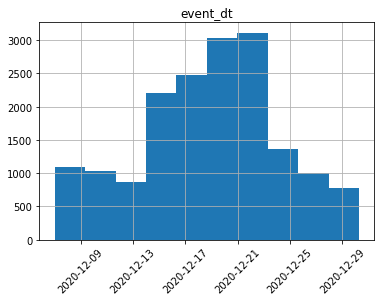

In [51]:
new_test_data.hist(column="event_dt", bins=10)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

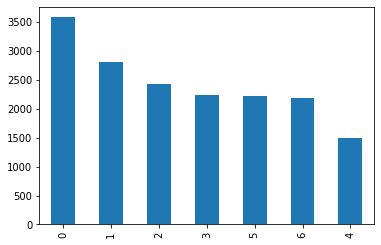

In [52]:
new_test_data['day'].value_counts().plot(kind='bar')

El día del 21 de diciembre del 2020 es donde más eventos estan distribuídos, asimismo, son los días domingos donde más ocurren estos eventos.

Ahora los datos se encuentran listos para realizar las pruebas A/B y poder comprobar los cambios relacionados con la introducción de un sistema de recomendaciones mejorado.

## Evaluar los resultados de la prueba A/B:

### ¿Qué puedes decir sobre los resultados de la prueba A/B según la diferencia estadítica de ambas proporciones?

In [54]:
conversions = new_test_data[['user_id', 'group']].drop_duplicates()
converted = pd.DataFrame(data={
    "user_id": new_test_data[new_test_data["event_name"] == "purchase"]["user_id"].unique(),
    "converted": 1
})
conversions = conversions.merge(converted, on="user_id", how="left")
conversions["converted"] = conversions["converted"].fillna(0)
conversions.head()

,user_id,group,converted
0,D1ABA3E2887B6A73,A,1.0
1,A7A3664BD6242119,A,0.0
2,4FF2998A348C484F,A,1.0
3,7473E0943673C09E,A,0.0
4,C46FE336D240A054,A,1.0


In [55]:
purchases = np.array([(conversions.query('group == "A" and converted == 1')['converted'].count()), 
                      conversions.query('group == "B" and converted == 1')['converted'].count()])
leads = np.array([(conversions.query('group == "A"')['group'].count()), 
                  (conversions.query('group == "B"')['group'].count())])

significance = 0.05
p1 = purchases[0]/leads[0]
p2 = purchases[1]/leads[1]
p_combined = ((purchases[0]+purchases[1])/(leads[0]+leads[1]))
difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0]+1/leads[1]))

distr = st.norm(0,1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value:', p_value)

if (p_value < significance):
    print('Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones.')
else:
    print('No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes.')

p-value: 0.24035836270660704
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes.


Se puede observar que no hay una diferencia estadística en ambas proporciones; esto quiere decir que los datos fueron correctamente ordenados.

## Conclusiones generales

En este proyecto, se analizaron los 4 datsets, para observar los tipos, la cantidad de datos; y se realizaron distintas conversiones en algunos tipos de columnas al tipo correcto.

Asimismo, en el registro de los datos no se encontraron datos duplicados; además se encontraon valores ausentes, pero esto ocurrió debido a que estos valores ausentes estaban relacionados con una columna, es decir, dependían de los datos de dicha columna.

Para calcular la conversión de todos los eventos, se realizó un embudo de eventos para conocer el número de usuarios que pasan por cada etapa del evento, y llegan hasta la etapa final de los eventos; resultando en una conversión baja en cada etapa de los eventos. Asimismo, se encontró que es el día 21 de diciembre del 2020 donde más eventos ocurren.

Se pudo observar que hay usuarios en ambos grupos, y que hay diferencias entre ambos grupos, es decir, hay usuarios únicos en el A que no estan presentes en el B. Esto quiere decir que los datos no fueron divididos correctamente.

En este proyecto, no se ha especificado el nivel de significancia utilizado para probar las hipótesis estadísticas. Por lo tanto, se decidió establecer un nivel de significancia del 0.05. 

Por último, se pudo observar que en las pruebas de los grupos no se encontraron diferencias significativas en las proporciones en cada uno de los eventos; por lo tanto se puede concluir que los datos se encuentran correctamente ordenados.

Como recomendación, se tendría que cenfocar más en el grupo de control A, ya que son los de mayor proporción y cantidad.